In [130]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [131]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [132]:
df = pd.read_csv("../Cpp/Output/ExpStat.txt", sep='\t')
df.head()

,NoiseType,Noise,X,Exp,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3
0,Gaussian,1.000000e-17,0,1.0,0.000000,0.00000,0.00000,0.000000e+00,9.999920e-18,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,Uniform,1.000000e-17,0,1.0,0.000000,0.00000,0.00000,0.000000e+00,9.999920e-18,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,Gaussian,1.000000e-16,0,1.0,1.088040,-4.44093,4.44093,1.088030e-16,9.999920e-17,-1.010300e-17,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.126669,0.000000,0.000000,0.000000,0.0
3,Uniform,1.000000e-16,0,1.0,1.179420,-2.22046,2.22046,1.179410e-16,9.999920e-17,1.509900e-18,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.183900,0.000000,0.000000,0.000000,0.0
4,Gaussian,1.000000e-15,0,1.0,0.991958,-3.44172,3.55274,9.919510e-16,9.999920e-16,1.157960e-17,...,0.051477,0.034051,0.028843,0.018628,0.012018,0.007712,0.003806,0.002103,0.001703,0.0


In [133]:
sNoise = sorted(df['Noise'].unique())
sNoise

[1e-17,
 1e-16,
 1e-15,
 1e-14,
 1e-13,
 1e-12,
 1e-11,
 1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 0.2]

# vs Noise vs X

In [134]:
def PlotSurface(value, noiseType, xlim=(-10,10), cmap=None):
    logz = (value == 'Uncertainty')
    dfOrderVsNoise = df[(df['NoiseType']==noiseType) & (df['X']>=xlim[0]) & (df['X']<=xlim[1])]\
                .pivot(index='Noise', columns='X', values=value)
    sOrder = dfOrderVsNoise.columns.values
    sNoise = dfOrderVsNoise.index.values if logz else dfOrderVsNoise.index.values
    sX, sY = np.meshgrid(sOrder, sNoise)
    sY = np.log10(sY)
    sZ = np.log10(dfOrderVsNoise.values) if logz else dfOrderVsNoise.values
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, -45) if logz else ax.view_init(30, 45)
    surf = ax.plot_surface( sX, sY, sZ, cmap=cmap if cmap else plt.cm.spring if logz else plt.cm.winter )
    cb = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15)
    
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    
    ax.set_xlabel('X')
    sXTick = [sOrder[i] for i in range(0, len(sOrder), 2)]
    ax.set_xticks(sXTick, [f'{x}' for x in sXTick])
    
    ax.set_ylabel('Input Noise')
    sYTick = [sNoise[i] for i in range(0, len(sNoise), 3)]
    ax.set_yticks(np.log10(sYTick), [f'{y:.1e}' for y in sYTick])
    
    ax.set_zlabel(value)
    if value == 'Error Deviation':
        pass
        # TODO: adjust color range 
        # ax.set_zlim([0, 2])
        # cb.set_clim([0, 2])
    if logz:
        zMin = int(math.floor(np.min(sZ)))
        zMax = int(math.ceil(np.max(sZ)))
        sZTick = range(zMin, zMax, int(math.ceil((zMax - zMin)/10)))
        ax.set_zticks(sZTick, [f'1e{z:+}' for z in sZTick])

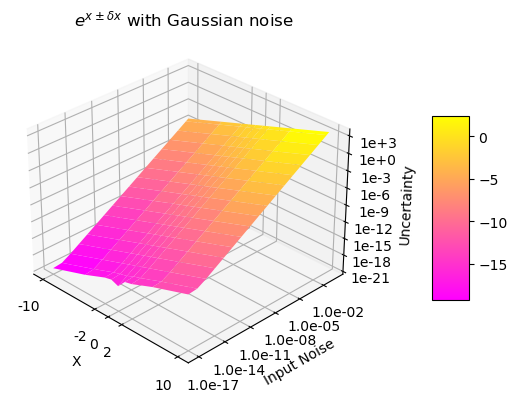

In [135]:
PlotSurface('Uncertainty', 'Gaussian')

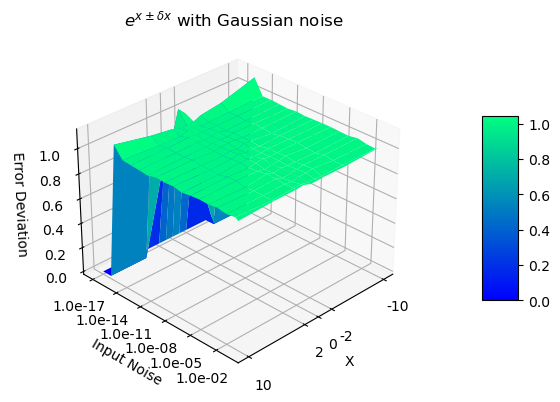

In [136]:
PlotSurface('Error Deviation', 'Gaussian')

# Deviation vs X

In [137]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=[2e-1, 1e-1, 1e-2, 1e-3], noiseType='Gaussian',
                sStyle=['+', '-', '--', 'x'], sColor = ['r','g','b','y','c','m'],
                logx=False, logy=True, xlim=[-10.3, +10.3], ylim=[1e-8, 1e+4], bbox=(1.15, 1.0)):
    fig, ax = plt.subplots()
    if logx:
        ax.set_xscale('log')
    if xlim:
        ax.set_xlim(xlim)
    if logy:
        ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise) ].sort_values('X')
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}', markersize=10)
    ax.legend(bbox_to_anchor=bbox)

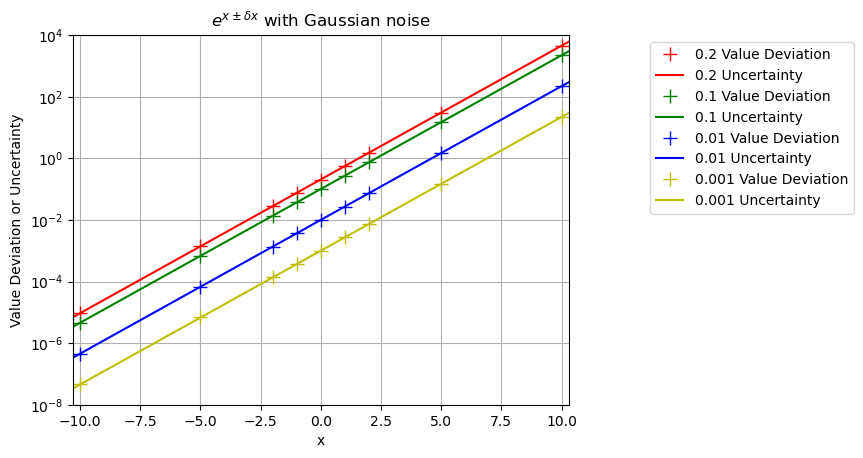

In [138]:
PlotValues()

In [139]:
def PlotErrorDev( noiseType='Gaussian', sNoise=[2e-1, 1e-1, 1e-2, 1e-3],
                  sColor=['r','g','b','y','c','m'], xlim=[-10.3, +10.3], ylim=[1e-9, 1e+4] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    if xlim:
        ax.set_xlim(xlim)
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.4, 1.0))
    ax2.legend(bbox_to_anchor=(1.6, 0.25))

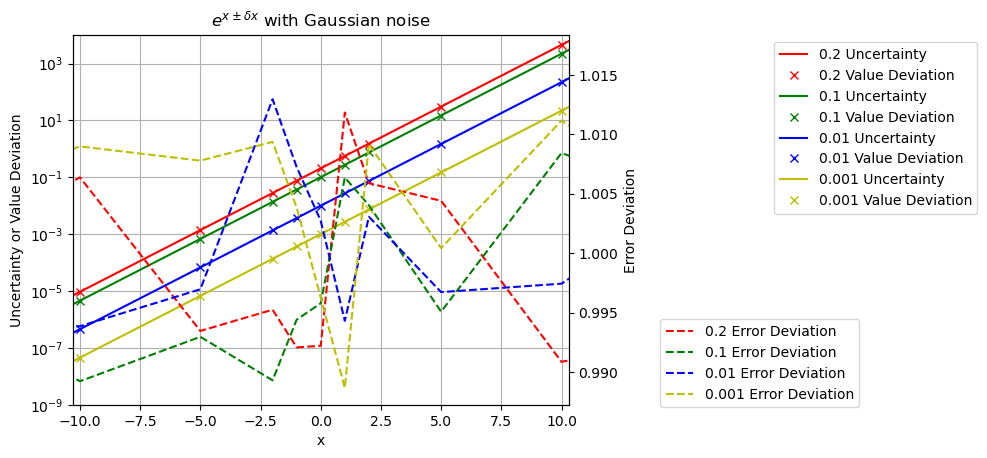

In [140]:
PlotErrorDev()

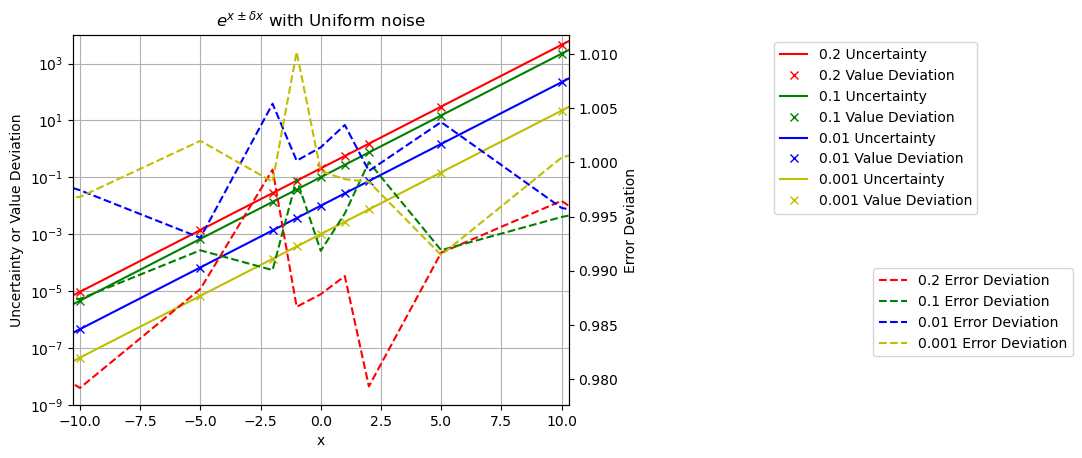

In [141]:
PlotErrorDev('Uniform')

In [142]:
def PlotErrorDev( noiseType='Gaussian', sNoiseStyleMarker=[(2e-1,'-','<'), (1e-1,'-.','>'), (1e-2,':','^'), (1e-3,'--','v')],
                  xlim=[-10.3, +10.3], ylim=[1e-8, 1e+5] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    if xlim:
        ax.set_xlim(xlim)
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    plt.grid(True)
    for noise, style, marker in sNoiseStyleMarker:
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], f'k{style}', label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], f'k{marker}', label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, style, marker in sNoiseStyleMarker:
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], c='gray', ls=style, label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.58, 0.5))
    ax2.legend(bbox_to_anchor=(1.15, 0.8))

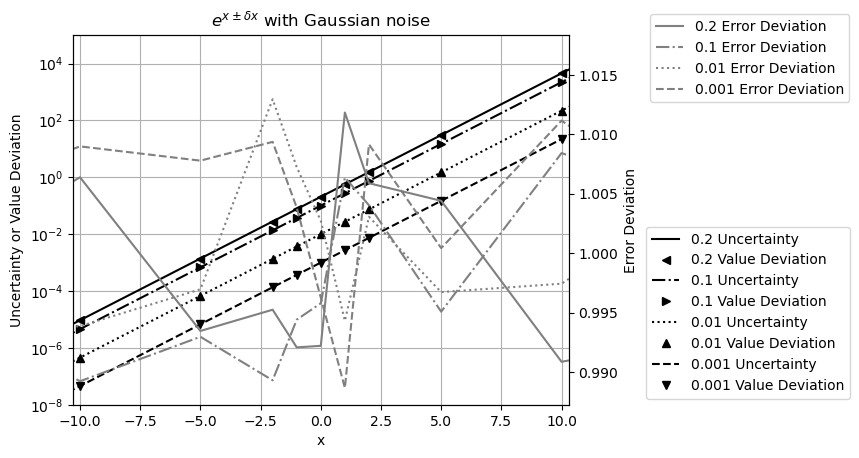

In [143]:
PlotErrorDev()

In [144]:
df[(df['NoiseType']=='Gaussian') & (df['Noise']>=1e-15) & (df['X']>-10) & (df['X']<10)]['Error Deviation'].describe()

count    112.000000
mean       1.000628
std        0.008920
min        0.983357
25%        0.994466
50%        0.999966
75%        1.005110
max        1.044530
Name: Error Deviation, dtype: float64

# Mean vs Bias

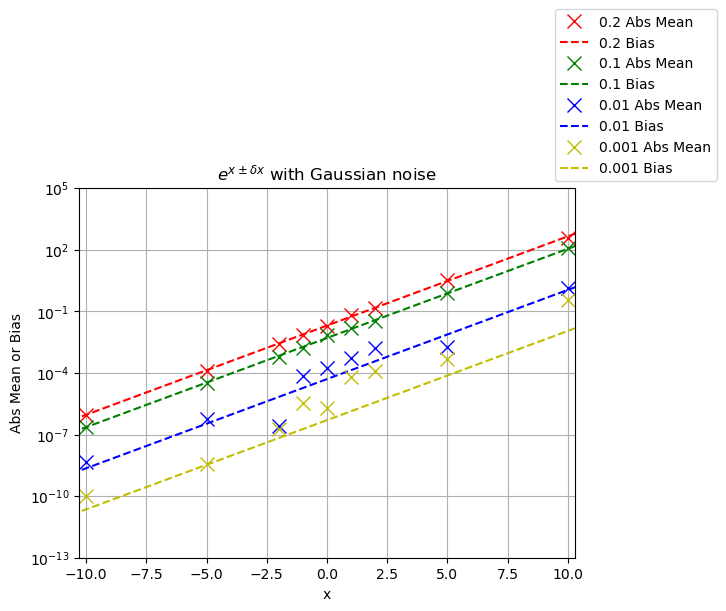

In [145]:
df['Abs Mean'] = abs(df['Mean'])
PlotValues(sValue=['Abs Mean', 'Bias'], sStyle=['x', '--'], ylim=[1e-13, 1e+5], bbox=(1.3, 1.0))

# Error Maximum and Minimum

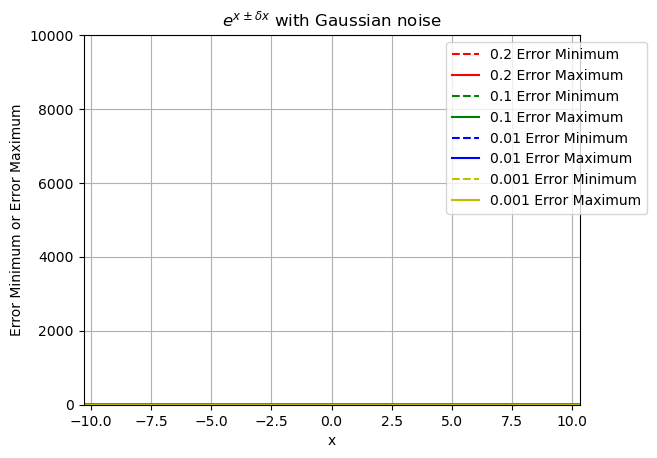

In [146]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'], logy=False)

# Histogram

In [147]:
df.rename(columns={'-3':'-3.0', '-2':'-2.0', '-1':'-1.0', '0':'0.0', '1':'1.0', '2':'2.0', '3':'3.0'}, inplace=True)

In [148]:
sHisto = [str(i/10) for i in range(-30, 32, 2)]
df[sHisto].head()

,-3.0,-2.8,-2.6,-2.4,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.046171,0.000000,0.000000,0.000000,0.000000,0.243902,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.126669,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.019400,0.000000,0.000000,0.000000,0.000000,0.315400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.183900,0.000000,0.000000,0.000000,0.0
4,0.000601,0.002003,0.002704,0.004907,0.008713,0.006209,0.015423,0.021332,0.034251,0.045969,...,0.051477,0.034051,0.028843,0.018628,0.012018,0.007712,0.003806,0.002103,0.001703,0.0


In [149]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot()
    ax.legend(bbox_to_anchor=(1.1, 1.05))    


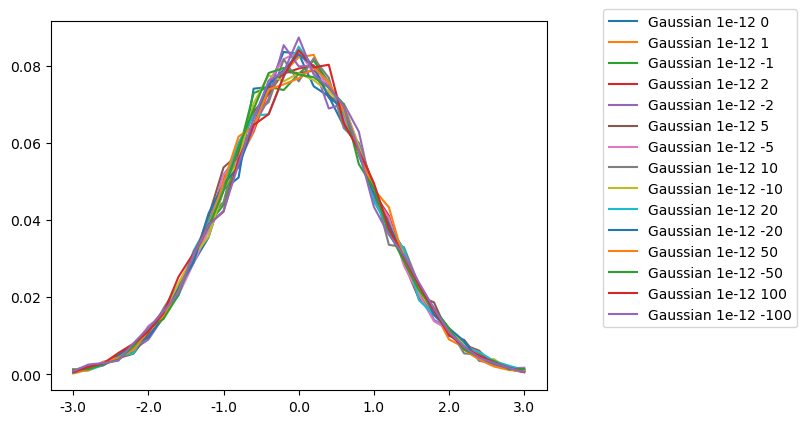

In [150]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-12])

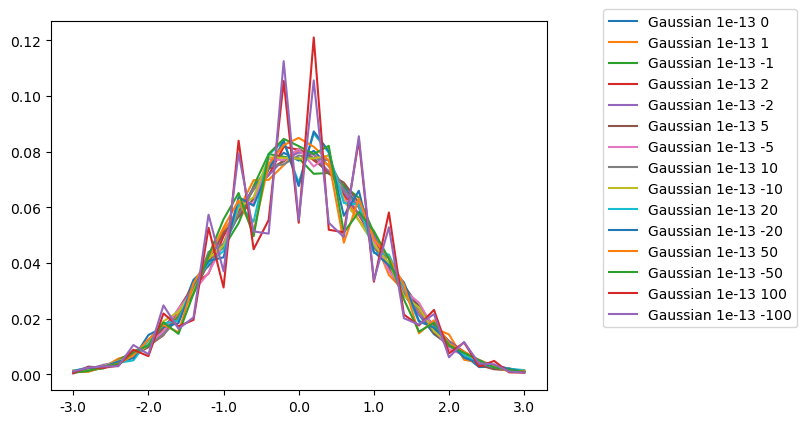

In [151]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-13])

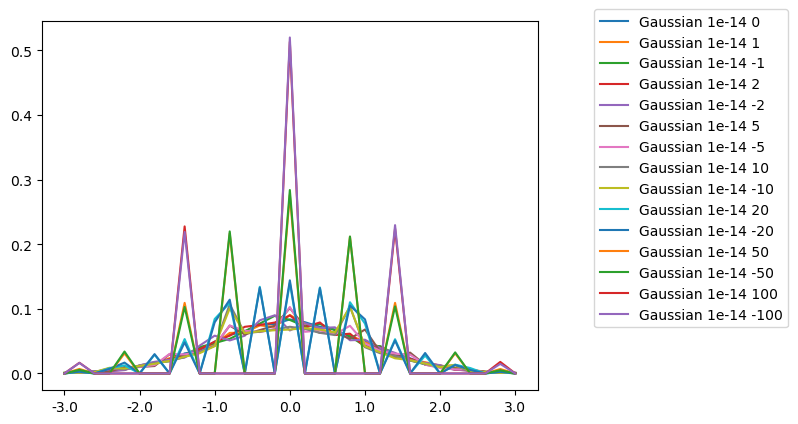

In [152]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-14])

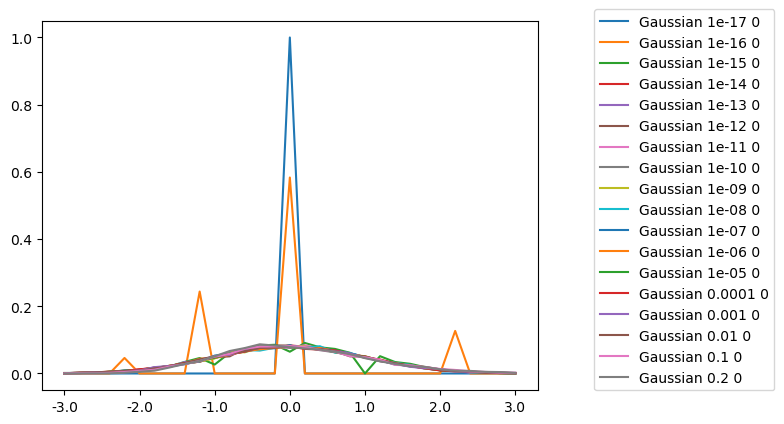

In [153]:
PlotHisto(sNoiseType=['Gaussian'], sX=[0])

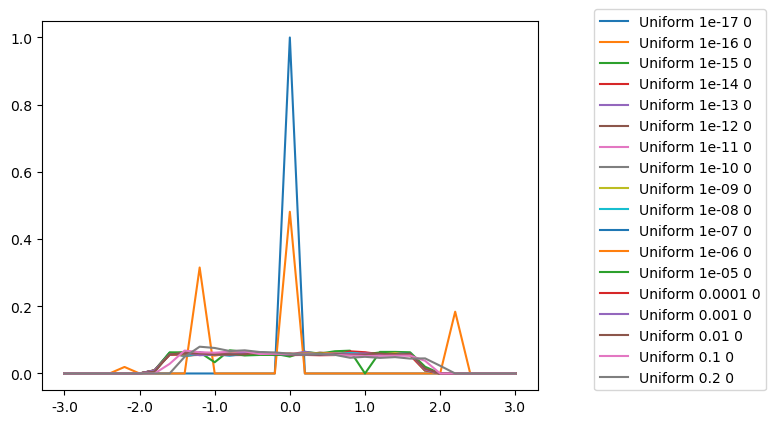

In [154]:
PlotHisto(sNoiseType=['Uniform'], sX=[0])

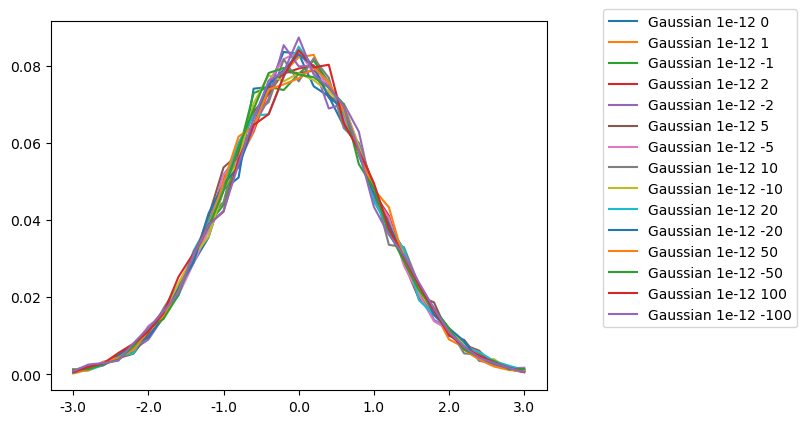

In [155]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-12])